In [2]:
import numpy as np 
import pandas as pd 

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv')

In [4]:
df = pd.read_csv('laptops.csv')
df.head(10)

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
5,MSI Crosshair 17 C12VF-264XES Intel Core i7-12...,New,MSI,Crosshair,Intel Core i7,32,1000,SSD,RTX 4060,17.3,No,1699.00
6,Lenovo Thinkpad E14 Gen 4 AMD Ryzen 5 5625U/8G...,New,Lenovo,ThinkPad,AMD Ryzen 5,8,256,SSD,NaN,14.0,No,909.00
7,ASUS VivoBook 15 F515JA-EJ2882W Intel Core i7-...,New,Asus,VivoBook,Intel Core i7,8,512,SSD,NaN,15.6,No,809.01
8,Medion Akoya E15415 Intel Core i5-10210U/8GB/2...,New,Medion,Akoya,Intel Core i5,8,256,SSD,NaN,15.6,No,519.00
9,HP Victus 16-d1038ns Intel Core i7-12700H/16GB...,New,HP,Victus,Intel Core i7,16,512,SSD,RTX 3050,16.1,No,1149.00


In [5]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [6]:
df.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

<Axes: xlabel='final_price', ylabel='Count'>

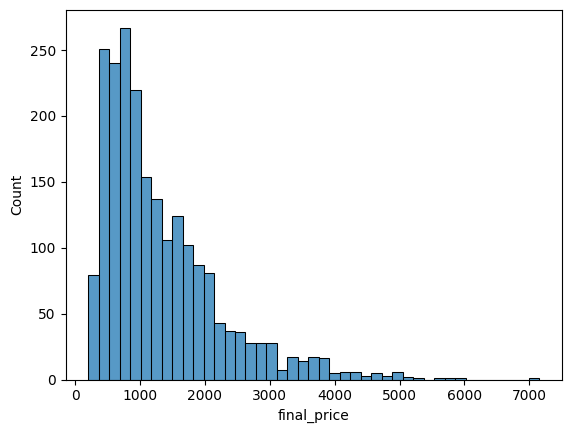

In [7]:

import seaborn as sns

sns.histplot(df['final_price'])

In [8]:
df = df[['ram','storage','screen','final_price']]
df.head(9)

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
5,32,1000,17.3,1699.00
6,8,256,14.0,909.00
7,8,512,15.6,809.01
8,8,256,15.6,519.00


### question 1

In [9]:
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

### question 2

In [10]:
df.describe()

,ram,storage,screen,final_price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


median = 16

### question 3

In [11]:
n = len(df)
 
val_split = int (n * 0.2)
test_split =  int(n * 0.2)
train_split = n - val_split - test_split

In [12]:
val_split, test_split, train_split 

(432, 432, 1296)

In [13]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [81]:
df_train=df.iloc[idx[:train_split]]
df_val=df.iloc[idx[train_split:train_split+val_split]]
df_test=df.iloc[idx[train_split+val_split:]]

In [82]:
df_test.head()

,ram,storage,screen,final_price
1925,32,1000,15.6,4805.65
612,16,512,13.0,2189.00
443,16,512,15.6,1349.00
1002,16,512,15.0,2175.83
1077,16,1000,15.6,1248.59


In [83]:

len(df_train), len(df_val), len(df_test)

(1296, 432, 432)

In [84]:
df_train=df_train.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)

In [85]:
meanscr = df_train['screen'].mean()
df_train['screen'] = df_train['screen'].fillna(meanscr)


In [86]:
df_train

,ram,storage,screen,final_price
0,32,1000,15.6,1123.29
1,4,64,14.1,201.05
2,32,1000,14.0,997.74
3,16,512,13.3,1016.00
4,32,1000,16.0,2739.00
...,...,...,...,...
1291,8,256,14.0,549.00
1292,32,1000,16.0,1999.00
1293,16,512,15.6,1059.00
1294,16,512,14.0,1671.00


In [87]:
df_train.isnull().sum()

ram            0
storage        0
screen         0
final_price    0
dtype: int64

In [88]:
base = df_train.columns
base

Index(['ram', 'storage', 'screen', 'final_price'], dtype='object')

In [89]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [92]:
X_train = df_train[base].values
y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

In [94]:
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)